In [1]:
import pandas as pd
import numpy as np
import us
from ast import literal_eval
import seaborn as sns
from matplotlib import pyplot as plt
from ast import literal_eval
from datetime import date
import plotly.express as px
from geopy.geocoders import Nominatim
import plotly.graph_objects as go



In [2]:
data_set = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")
data_set.shape

(1826360, 6)

In [3]:
def get_state_abbrev(state_name):
  name = us.states.lookup(state_name)  
  abbre = name.abbr
  return abbre

def set_title_and_labels(title, x, y):
    plt.title(title, fontsize=13)
    plt.xlabel(x,fontsize = 10.5)
    plt.ylabel(y,fontsize = 10.)
    

In [4]:
states_abbr = []
data_set.head(4)
data_set['deaths']= pd.to_numeric(data_set['deaths'])
data_set['state_abbrev'] = data_set['state'].apply(get_state_abbrev)
data_set.head(4)

,date,county,state,fips,cases,deaths,state_abbrev
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0,WA
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0,WA
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0,WA
3,2020-01-24,Cook,Illinois,17031.0,1,0.0,IL


In [5]:
# WA and NY states have to be distinguished from WA D.C and NYC
# Therefore, I will change their names by adding 'State' 

data_set['state'] = data_set['state'].apply(lambda x: 'Washington State' if x =='Washington' else x)
data_set['state'] = data_set['state'].apply(lambda x: 'New York State' if x =='New York' else x)

In [6]:
# Getting Deaths number by states

death_by_state = data_set[data_set.date == '2021-10-12'].groupby(['state']).deaths.sum().sort_values(ascending=False)
# Getting the top 10 states which have the hieghest covid-19 deaths
deaths_top10_states = death_by_state.index[:10].tolist()
# Getting the covid-19 deaths's number of the top 10 states
deaths = death_by_state.values[:10].tolist()

In [7]:
# Getting covid-19 cases numbers by states

cases_by_state = data_set[data_set.date == '2021-10-12'].groupby(['state']).cases.sum().sort_values(ascending=False)
# Getting the top 10 states which have the hieghest covid-19 infections
cases_top10_states = cases_by_state.index[:10].tolist()
# Getting the covid-19 cases numbers of the top 10 states
cases = cases_by_state.values[:10].tolist()

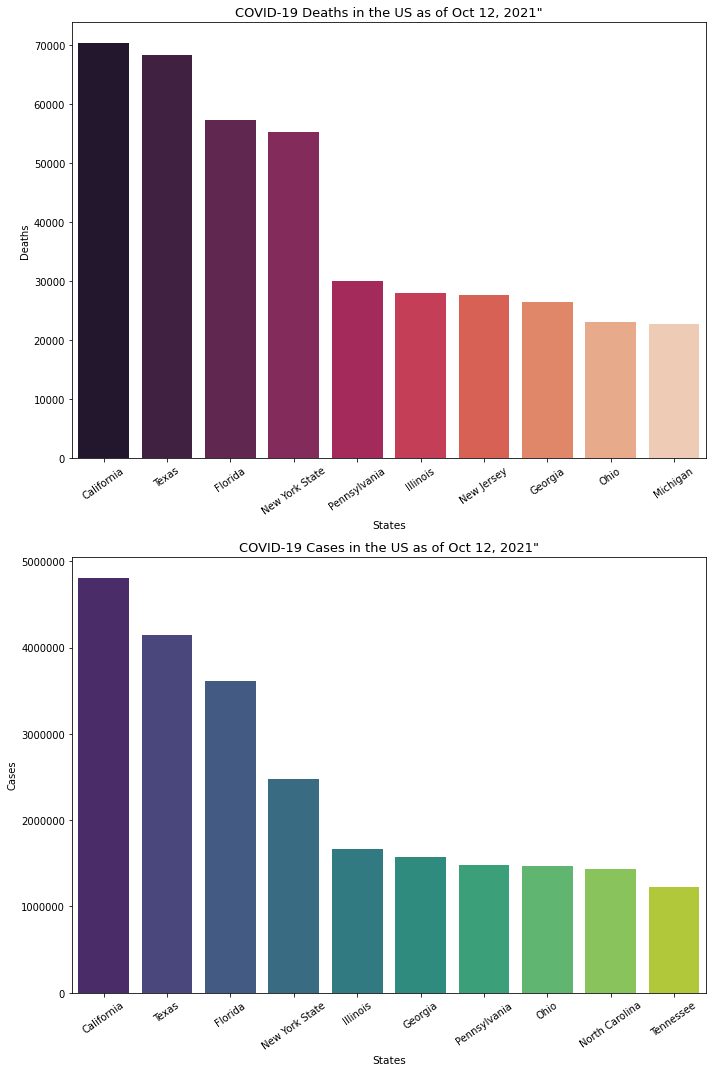

In [8]:
plt.figure(figsize = (10,15))
plt.subplot(2, 1, 1)
sns.barplot(data = data_set, x = deaths_top10_states, y = deaths, palette = 'rocket')
plt.xticks(rotation = 35)
set_title_and_labels('COVID-19 Deaths in the US as of Oct 12, 2021"', 'States', "Deaths")

plt.subplot(2, 1, 2)
sns.barplot(data = data_set, x = cases_top10_states, y = cases, palette = "viridis")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation = 35)
set_title_and_labels('COVID-19 Cases in the US as of Oct 12, 2021"', 'States', "Cases")

plt.tight_layout()
plt.show();